In [1]:
from sklearn import datasets
import pandas as pd
boston_data = datasets.load_boston()
df_boston = pd.DataFrame(boston_data.data,columns=boston_data.feature_names)
df_boston['target'] = pd.Series(boston_data.target)
df_boston.head()
df = df_boston.copy()

# Normal 분포 확인하기[Distribution , QQ]

정규분포 검정을 하기 전에 간단히 살펴볼 수 있는데, 그 중에서 중요한 tool 은 QQ plot 이다.

Q-Q(Quantile-Quantile) 플롯은 분석하고자 하는 샘플의 분포과 정규 분포의 분포 형태를 비교하는 시각적 도구이다. Q-Q 플롯은 동일 분위수에 해당하는 정상 분포의 값과 주어진 분포의 값을 한 쌍으로 만들어 스캐터 플롯(scatter plot)으로 그린 것이다. Q-Q 플롯을 그리는 구체적인 방법은 다음과 같다.

1. 대상 샘플을 크기에 따라 정렬(sort)한다.
2. 각 샘플의 분위수(quantile number)를 구한다.
3. 각 샘플의 분위수와 일치하는 분위수를 가지는 정규 분포 값을 구한다.
4. 대상 샘플과 정규 분포 값을 하나의 쌍으로 생각하여 2차원 공간에 하나의 점(point)으로 그린다.
5. 모든 샘플에 대해 2부터 4까지의 과정을 반복하여 스캐터 플롯과 유사한 형태의 플롯을 완성한다.
6. 비교를 위한 45도 직선을 그린다.
7. SciPy 패키지의 stats 서브 패키지는 Q-Q 플롯을 계산하고 그리기 위한 probplot 명령을 제공한다.

probplot은 기본적으로 인수로 보낸 데이터 샘플에 대한 Q-Q 정보만을 반환하고 챠트는 그리지 않는다. 만약 차트를 그리고 싶다면 plot 인수에 matplotlib.pylab 모듈 객체 혹은 Axes 클래스 객체를 넘겨주어야 한다.

정규 분포를 따르는 데이터 샘플을 Q-Q 플롯으로 그리면 다음과 같이 직선의 형태로 나타난다.



In [2]:
import matplotlib.pyplot as plt
from scipy.stats import norm, skew #for some statistics
import seaborn as sns
import scipy as sp
import numpy as np
from scipy import stats # scipy 는 자동으로 필요한 module 을 import 하지 않기 때문이다.


 mu = 22.53 and sigma = 9.19



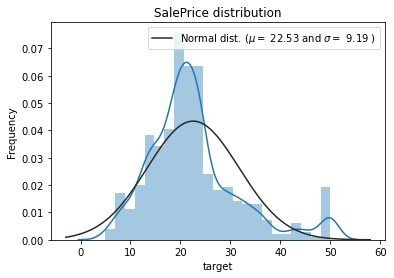

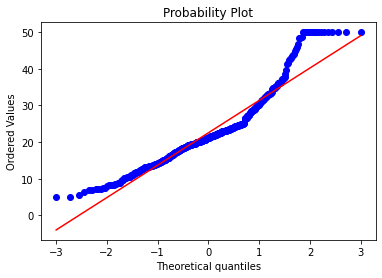

In [3]:
# normal distribution 과 비교 가능하게 해준다.
sns.distplot(df['target'] , fit=sp.stats.norm); 

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['target']) 
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['target'], plot=plt) # plot 에 matplotlib 의 pyplot 모듈을 전해주어야 그재서야 그리기 시작한다.
plt.show()

# 각 colums 에 대해 분포 확인하기

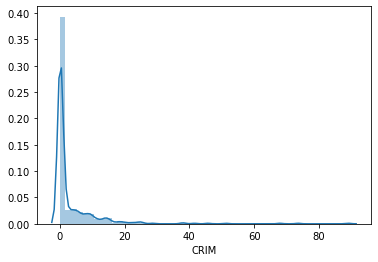

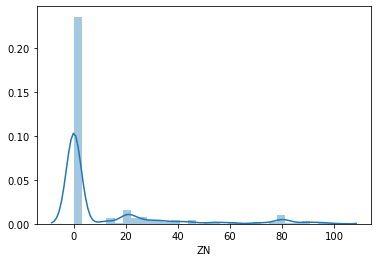

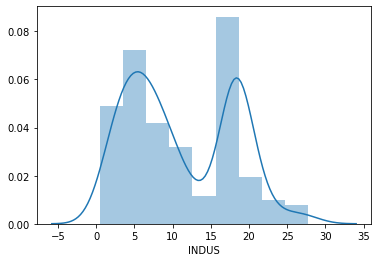

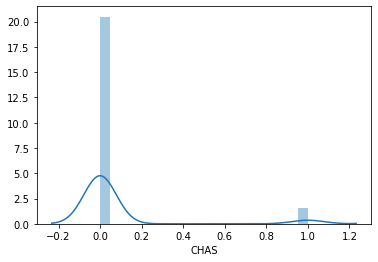

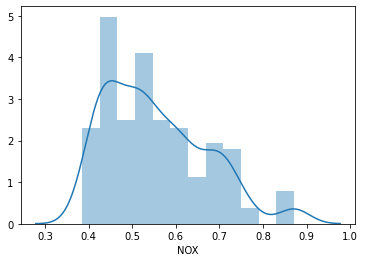

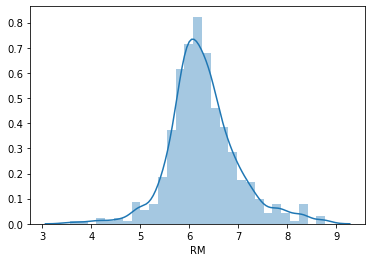

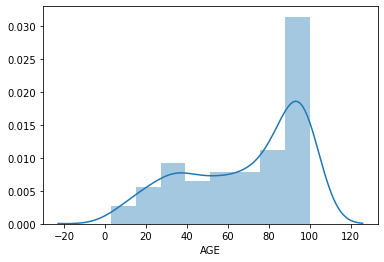

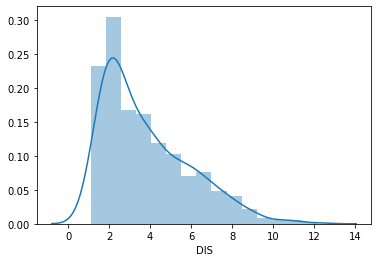

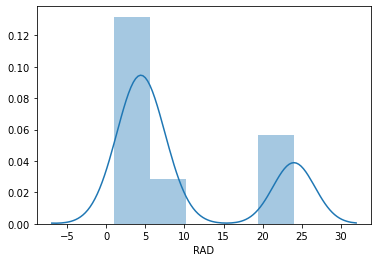

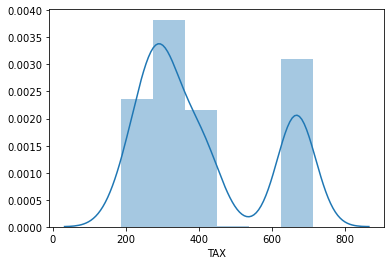

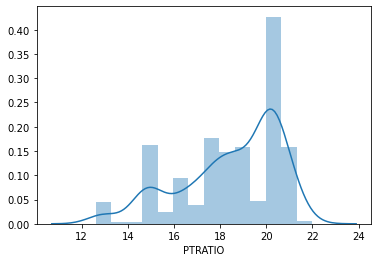

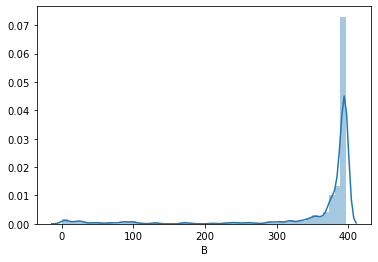

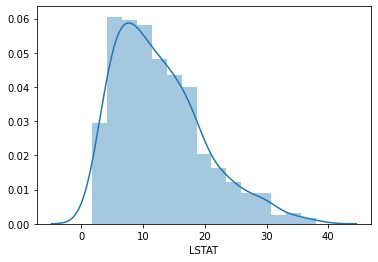

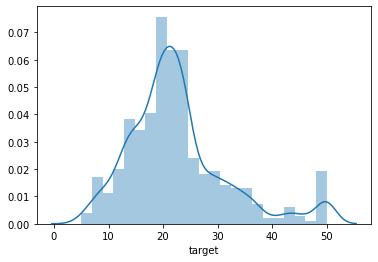

In [7]:
import seaborn as sns
df=df_boston
for i, col in enumerate(df.columns):
    plt.figure(i)
    sns.distplot(df[col])

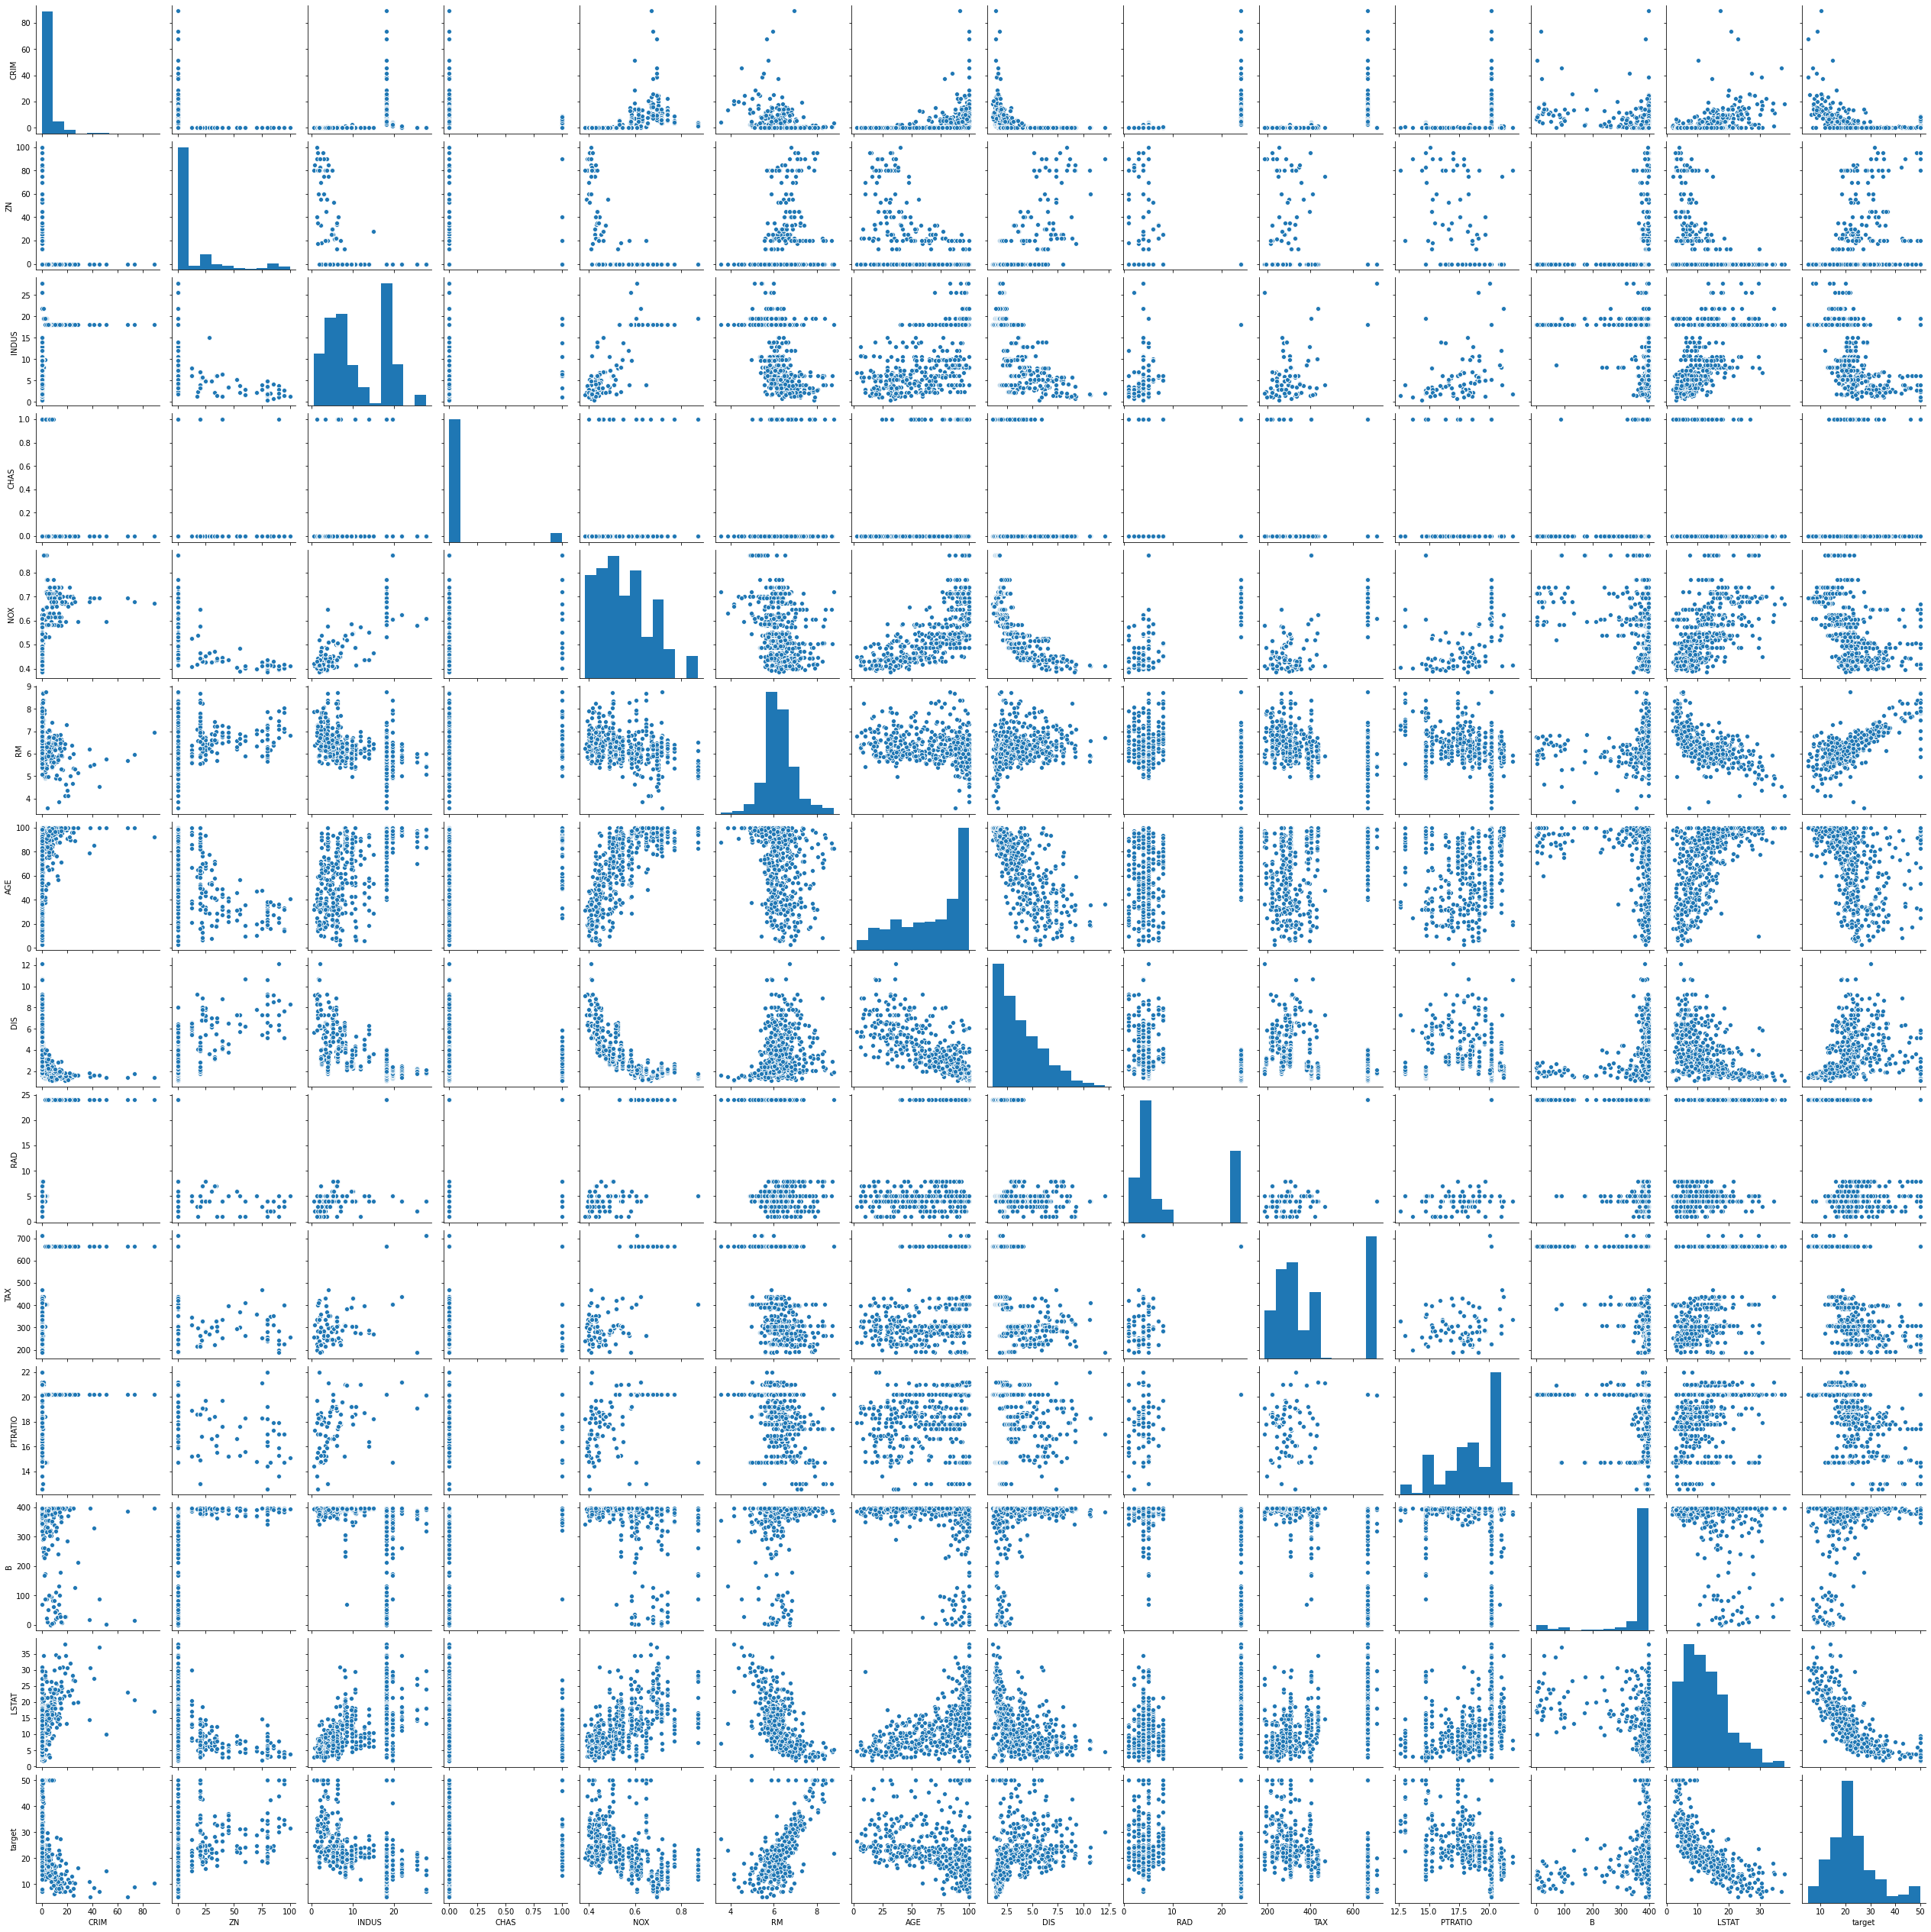

In [8]:
sns.pairplot(df)